# PROJECT LUNG DISEASES

## REQUIREMENT

In [ ]:
import os
import random
import shutil
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50, VGG19, InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import precision_score, recall_score, f1_score
import itertools

## DATA PREP

### Import Dataset

In [ ]:
! pip install -q kaggle
from google.colab import files
#upload kaggle.json API akun pribadi
files.upload()
# make directory for save the dataset
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
# Import dataset from kaggle to colab
! kaggle datasets download -d anjay007/penyakit-paru-paru-5-kelas

Saving kaggle.json to kaggle.json
 95% 266M/280M [00:03<00:00, 95.5MB/s]
100% 280M/280M [00:03<00:00, 79.6MB/s]


### Unzip dataset

In [ ]:
! unzip  /content/penyakit-paru-paru-5-kelas.zip -d lung_disease/
#menghapus zip file dataset
!rm -r /content/penyakit-paru-paru-5-kelas.zip
#menghapus zip file dataset
!rm -r /content/kaggle.json

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: lung_disease/train_dir/bacterial_pneumonia/person26_bacteria_132.jpeg  
  inflating: lung_disease/train_dir/bacterial_pneumonia/person26_bacteria_133.jpeg  
  inflating: lung_disease/train_dir/bacterial_pneumonia/person27_bacteria_135.jpeg  
  inflating: lung_disease/train_dir/bacterial_pneumonia/person27_bacteria_136.jpeg  
  inflating: lung_disease/train_dir/bacterial_pneumonia/person27_bacteria_137.jpeg  
  inflating: lung_disease/train_dir/bacterial_pneumonia/person29_bacteria_144.jpeg  
  inflating: lung_disease/train_dir/bacterial_pneumonia/person2_bacteria_3.jpeg  
  inflating: lung_disease/train_dir/bacterial_pneumonia/person30_bacteria_147.jpeg  
  inflating: lung_disease/train_dir/bacterial_pneumonia/person30_bacteria_148.jpeg  
  inflating: lung_disease/train_dir/bacterial_pneumonia/person30_bacteria_149.jpeg  
  inflating: lung_disease/train_dir/bacterial_pneumonia/person30_bacteria_150.jpeg  
  inflati

### Initiation Directory

In [ ]:
#Path dataset
BASE_DIR = '/content/lung_disease/Lung Disease Dataset'

#Path train, test, dan validation
train = '/content/lung_disease/train_dir'
val = '/content/lung_disease/test_dir'

### Datagenerator

In [ ]:
# Membuat objek ImageDataGenerator untuk augmentasi data pada set pelatihan
train_datagen = ImageDataGenerator(
    rescale=1./255,            # Rescale nilai piksel ke rentang [0, 1]
    zoom_range=0.2 #,            # Memperbesar gambar hingga 20%
    #fill_mode='nearest'        # Mengisi piksel yang kosong dengan piksel terdekat
)

# Membuat objek ImageDataGenerator untuk preprocessing pada set pengujian dan validasi
test_val_datagen = ImageDataGenerator(rescale=1./255)

# Menggunakan objek ImageDataGenerator untuk memuat data gambar dari direktori dan melakukan augmentasi
train_generator = train_datagen.flow_from_directory(
    train,
    target_size=(224, 224),
    class_mode='categorical',  # Mode kelas untuk klasifikasi banyak kelas
    batch_size = 4
)

val_generator = test_val_datagen.flow_from_directory(
    val,
    target_size=(224, 224),
    class_mode='categorical',
    batch_size = 4
)


Found 6080 images belonging to 5 classes.
Found 982 images belonging to 5 classes.


## TRAINNING W RESNET50

### Load pretrined CNN

In [ ]:
# Memuat model ResNet50 tanpa layer teratas (top layer)
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the convolutional layers
for layer in resnet_model.layers:
    layer.trainable = False

### Project Model

In [ ]:
#Membuat model
model_resnet = Sequential()
model_resnet.add(resnet_model)
model_resnet.add(Flatten())
model_resnet.add(Dense(train_generator.num_classes, activation='softmax'))

print(model_resnet.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 5)                 501765    
                                                                 
Total params: 24089477 (91.89 MB)
Trainable params: 501765 (1.91 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________
None


In [ ]:
# Compile model
model_resnet.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])

# Train model
history = model_resnet.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator
)

Epoch 1/30
1520/1520 [==============================] - 130s 82ms/step - loss: 1.5917 - acc: 0.3363 - val_loss: 1.1931 - val_acc: 0.4908
Epoch 2/30
1520/1520 [==============================] - 114s 75ms/step - loss: 1.3872 - acc: 0.4237 - val_loss: 1.0024 - val_acc: 0.6049
Epoch 3/30
1520/1520 [==============================] - 113s 74ms/step - loss: 1.2652 - acc: 0.4773 - val_loss: 0.9706 - val_acc: 0.6273
Epoch 4/30
1520/1520 [==============================] - 112s 74ms/step - loss: 1.2293 - acc: 0.5066 - val_loss: 0.9235 - val_acc: 0.6303
Epoch 5/30
1520/1520 [==============================] - 112s 73ms/step - loss: 1.1665 - acc: 0.5247 - val_loss: 0.9090 - val_acc: 0.6558
Epoch 6/30
1520/1520 [==============================] - 112s 73ms/step - loss: 1.1553 - acc: 0.5339 - val_loss: 0.9008 - val_acc: 0.6497
Epoch 7/30
1520/1520 [==============================] - 112s 74ms/step - loss: 1.1015 - acc: 0.5508 - val_loss: 0.8219 - val_acc: 0.6864
Epoch 8/30
1520/1520 [===================

In [ ]:
#model_resnet.save("resnet_model.h5")
#with open('history_resnet.txt', mode='w') as file:
#    file.write(str(history.history['acc'])+'/n'+str(history.history['loss']))
#    file.close()

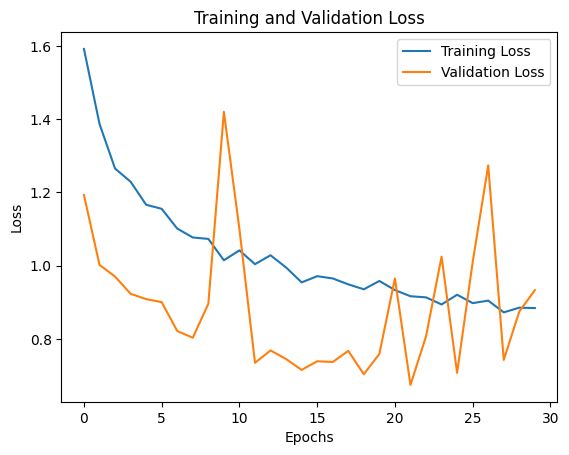

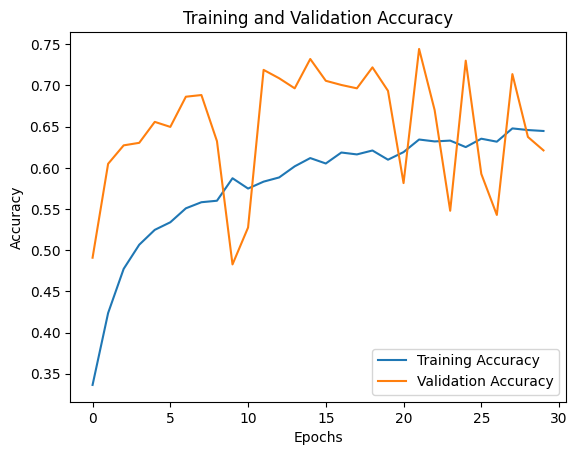

In [ ]:
# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
results = model_resnet.evaluate(val_generator)

print("Loss:", results[0])
print("Accuracy:", results[1])

246/246 [==============================] - 6s 26ms/step - loss: 0.9335 - acc: 0.6212
Loss: 0.9334726333618164
Accuracy: 0.6211812496185303


In [ ]:
train_predictions = model_resnet.predict(train_generator, verbose=1)
train_predicted_labels = np.argmax(train_predictions, axis=1)
train_true_labels = train_generator.classes

train_class_report = classification_report(train_true_labels,
                                          train_predicted_labels, target_names=train_generator.class_indices,
                                          digits=5)
print("\nTraining classification report:\n", train_class_report)



1520/1520 [==============================] - 100s 65ms/step

Training classification report:
                      precision    recall  f1-score   support

bacterial_pneumonia    0.20611   0.41475   0.27537      1220
            covid19    0.20195   0.30008   0.24142      1243
             normal    0.18998   0.08907   0.12128      1235
       tuberculosis    0.17804   0.15385   0.16506      1170
    viral_pneumonia    0.17021   0.02640   0.04571      1212

           accuracy                        0.19753      6080
          macro avg    0.18926   0.19683   0.16977      6080
       weighted avg    0.18943   0.19753   0.17012      6080



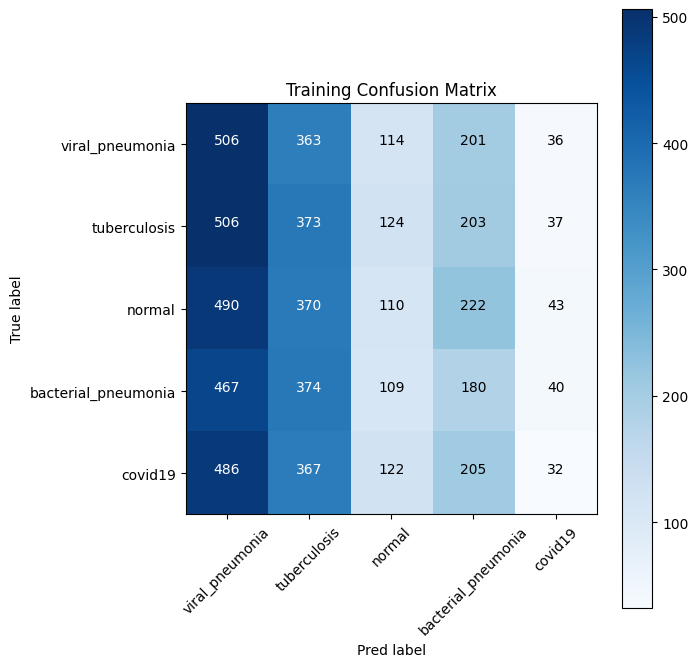

In [ ]:
inp = '/content/lung_disease'
classes = []
filename = inp
for sub_folder in os.listdir(os.path.join(filename, 'train_dir')):
    classes.append(sub_folder)
# print(classes)
classname_label = classes
train_conf_matrix = confusion_matrix(train_true_labels, train_predicted_labels)

# Plot
plt.figure(figsize=(7, 7))
plt.imshow(train_conf_matrix, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Training Confusion Matrix")
plt.colorbar()

tick_marks = np.arange(len(classname_label))
plt.xticks(tick_marks, classname_label, rotation=45)
plt.yticks(tick_marks, classname_label)

thresh = train_conf_matrix.max() / 2.0
for i, j in itertools.product(
    range(train_conf_matrix.shape[0]), range(train_conf_matrix.shape[1])
):
    plt.text(
        j,
        i,
        train_conf_matrix[i, j],
        horizontalalignment="center",
        color="white" if train_conf_matrix[i, j] > thresh else "black",
    )

plt.tight_layout()
plt.ylabel("True label")
plt.xlabel("Pred label")
plt.show()

## TRAINNING W VGG19


### Load Pretrained CNN

In [ ]:
VGG19_model =VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the convolutional layers
for layer in VGG19_model.layers:
    layer.trainable = False

80134624/80134624 [==============================] - 1s 0us/step


### Our Model

In [ ]:
#Membuat model
model_VGG19 = Sequential()
model_VGG19.add(VGG19_model)
model_VGG19.add(Flatten())
model_VGG19.add(Dense(train_generator.num_classes, activation='softmax'))

print(model_VGG19.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 5)                 125445    
                                                                 
Total params: 20149829 (76.87 MB)
Trainable params: 125445 (490.02 KB)
Non-trainable params: 20024384 (76.39 MB)
_________________________________________________________________
None


In [ ]:
# Compile model
model_VGG19.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])

# Train model
history_VGG19 = model_VGG19.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator
)

Epoch 1/30
1520/1520 [==============================] - 113s 72ms/step - loss: 0.8325 - acc: 0.6750 - val_loss: 0.5659 - val_acc: 0.7790
Epoch 2/30
1520/1520 [==============================] - 106s 70ms/step - loss: 0.5650 - acc: 0.7786 - val_loss: 0.5278 - val_acc: 0.7933
Epoch 3/30
1520/1520 [==============================] - 105s 69ms/step - loss: 0.4848 - acc: 0.8135 - val_loss: 0.5017 - val_acc: 0.8014
Epoch 4/30
1520/1520 [==============================] - 105s 69ms/step - loss: 0.4324 - acc: 0.8336 - val_loss: 0.3841 - val_acc: 0.8615
Epoch 5/30
1520/1520 [==============================] - 112s 74ms/step - loss: 0.4051 - acc: 0.8388 - val_loss: 0.4267 - val_acc: 0.8238
Epoch 6/30
1520/1520 [==============================] - 107s 70ms/step - loss: 0.3738 - acc: 0.8520 - val_loss: 0.4836 - val_acc: 0.8116
Epoch 7/30
1520/1520 [==============================] - 105s 69ms/step - loss: 0.3439 - acc: 0.8668 - val_loss: 0.3600 - val_acc: 0.8697
Epoch 8/30
1520/1520 [===================

In [ ]:
model_VGG19.save("VGG19_model_skenario1.h5")
with open('history_VGG19.txt', mode='w') as file:
    file.write(str(history_VGG19.history['acc'])+'/n'+str(history_VGG19.history['loss']))
    file.close()

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


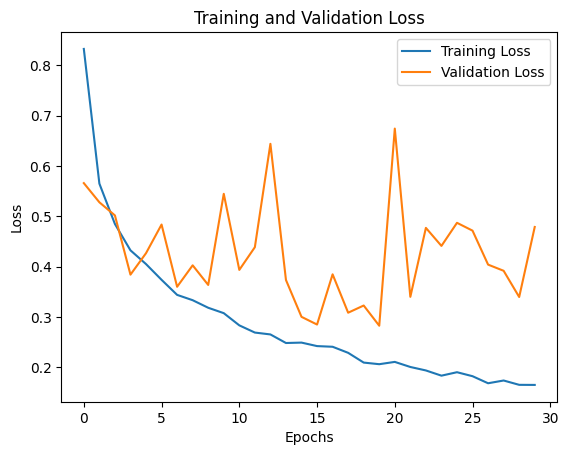

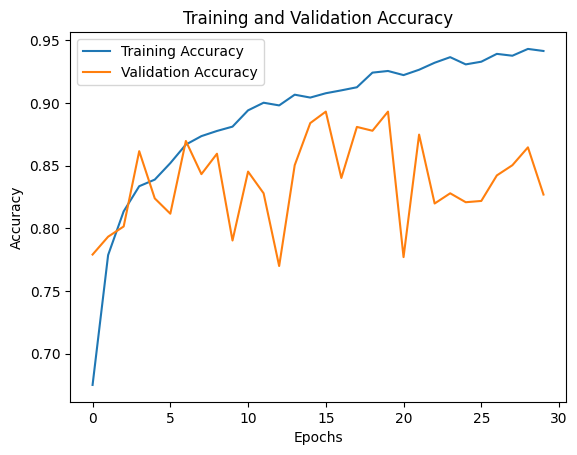

In [ ]:
# Plot loss
plt.plot(history_VGG19.history['loss'], label='Training Loss')
plt.plot(history_VGG19.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy
plt.plot(history_VGG19.history['acc'], label='Training Accuracy')
plt.plot(history_VGG19.history['val_acc'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
results = model_VGG19.evaluate(val_generator)

print("Loss:", results[0])
print("Accuracy:", results[1])

246/246 [==============================] - 9s 36ms/step - loss: 0.4788 - acc: 0.8269
Loss: 0.47878485918045044
Accuracy: 0.8268839120864868


In [ ]:
train_predictions = model_VGG19.predict(train_generator, verbose=1)
train_predicted_labels = np.argmax(train_predictions, axis=1)
train_true_labels = train_generator.classes

train_class_report = classification_report(train_true_labels,
                                          train_predicted_labels, target_names=train_generator.class_indices,
                                          digits=5)
print("\nTraining classification report:\n", train_class_report)




Training classification report:
                      precision    recall  f1-score   support

bacterial_pneumonia    0.20703   0.21230   0.20963      1220
            covid19    0.21752   0.22767   0.22248      1243
             normal    0.21717   0.20891   0.21296      1235
       tuberculosis    0.20819   0.20427   0.20621      1170
    viral_pneumonia    0.18708   0.18399   0.18552      1212

           accuracy                        0.20757      6080
          macro avg    0.20740   0.20743   0.20736      6080
       weighted avg    0.20748   0.20757   0.20747      6080



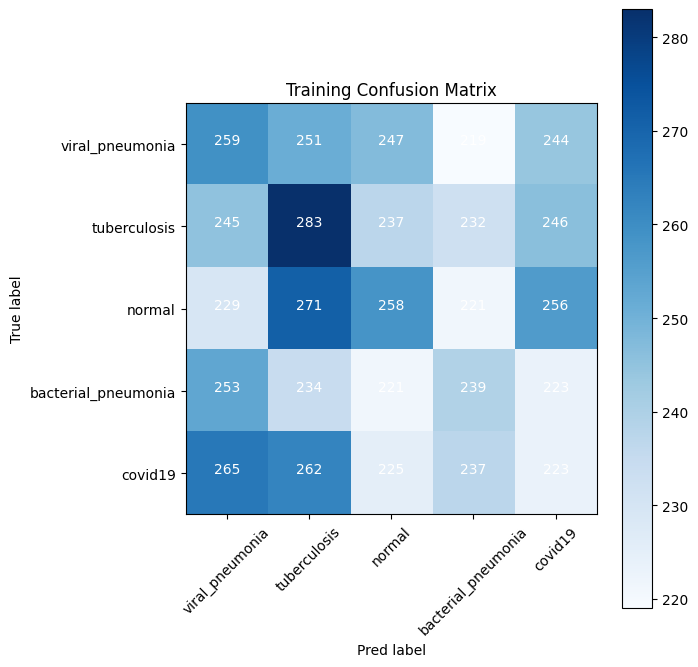

In [ ]:
inp = '/content/lung_disease'
classes = []
filename = inp
for sub_folder in os.listdir(os.path.join(filename, 'train_dir')):
    classes.append(sub_folder)
# print(classes)
classname_label = classes
train_conf_matrix = confusion_matrix(train_true_labels, train_predicted_labels)

# Plot
plt.figure(figsize=(7, 7))
plt.imshow(train_conf_matrix, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Training Confusion Matrix")
plt.colorbar()

tick_marks = np.arange(len(classname_label))
plt.xticks(tick_marks, classname_label, rotation=45)
plt.yticks(tick_marks, classname_label)

thresh = train_conf_matrix.max() / 2.0
for i, j in itertools.product(
    range(train_conf_matrix.shape[0]), range(train_conf_matrix.shape[1])
):
    plt.text(
        j,
        i,
        train_conf_matrix[i, j],
        horizontalalignment="center",
        color="white" if train_conf_matrix[i, j] > thresh else "black",
    )

plt.tight_layout()
plt.ylabel("True label")
plt.xlabel("Pred label")
plt.show()

## TRAINNING W InceptionV3


### Load Pretrained CNN

In [ ]:
InceptionV3_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the convolutional layers
for layer in InceptionV3_model.layers:
    layer.trainable = False

87910968/87910968 [==============================] - 0s 0us/step


### Our Model

In [ ]:
#Membuat model
model_InceptionV3 = Sequential()
model_InceptionV3.add(InceptionV3_model)
model_InceptionV3.add(Flatten())
model_InceptionV3.add(Dense(train_generator.num_classes, activation='softmax'))

print(model_InceptionV3.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_1 (Flatten)         (None, 51200)             0         
                                                                 
 dense_1 (Dense)             (None, 5)                 256005    
                                                                 
Total params: 22058789 (84.15 MB)
Trainable params: 256005 (1000.02 KB)
Non-trainable params: 21802784 (83.17 MB)
_________________________________________________________________
None


In [ ]:
# Compile model
model_InceptionV3.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['acc'])

# Train model
history_InceptionV3 = model_InceptionV3.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator
)

Epoch 1/30
1520/1520 [==============================] - 124s 75ms/step - loss: 1.1127 - acc: 0.6827 - val_loss: 1.0450 - val_acc: 0.7230
Epoch 2/30
1520/1520 [==============================] - 119s 78ms/step - loss: 0.8346 - acc: 0.7724 - val_loss: 1.2994 - val_acc: 0.7200
Epoch 3/30
1520/1520 [==============================] - 116s 76ms/step - loss: 0.7515 - acc: 0.8061 - val_loss: 1.1384 - val_acc: 0.7607
Epoch 4/30
1520/1520 [==============================] - 113s 74ms/step - loss: 0.6811 - acc: 0.8255 - val_loss: 0.8607 - val_acc: 0.7882
Epoch 5/30
1520/1520 [==============================] - 113s 75ms/step - loss: 0.6136 - acc: 0.8387 - val_loss: 1.5723 - val_acc: 0.7179
Epoch 6/30
1520/1520 [==============================] - 114s 75ms/step - loss: 0.6043 - acc: 0.8433 - val_loss: 0.8873 - val_acc: 0.7963
Epoch 7/30
1520/1520 [==============================] - 110s 72ms/step - loss: 0.5493 - acc: 0.8592 - val_loss: 0.8674 - val_acc: 0.7974
Epoch 8/30
1520/1520 [===================

In [ ]:
model_InceptionV3.save("InceptionV3_model.h5")
with open('history_InceptionV3.txt', mode='w') as file:
    file.write(str(history_InceptionV3.history['acc'])+'/n'+str(history_InceptionV3.history['loss']))
    file.close()

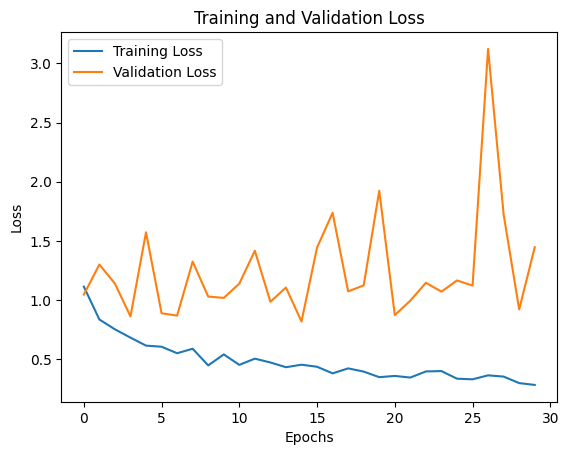

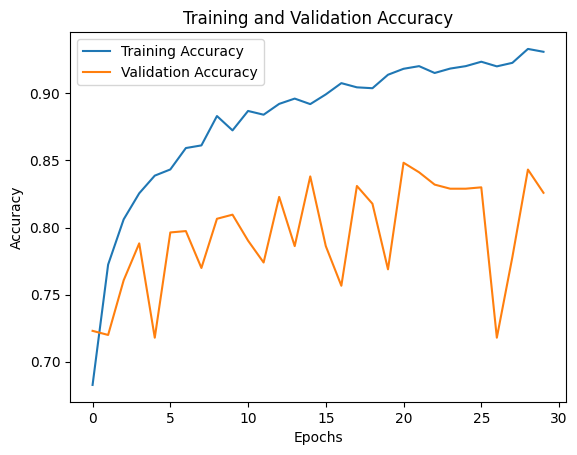

In [ ]:
# Plot loss
plt.plot(history_InceptionV3.history['loss'], label='Training Loss')
plt.plot(history_InceptionV3.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy
plt.plot(history_InceptionV3.history['acc'], label='Training Accuracy')
plt.plot(history_InceptionV3.history['val_acc'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
results = model_InceptionV3.evaluate(val_generator)

print("Loss:", results[0])
print("Accuracy:", results[1])

246/246 [==============================] - 9s 37ms/step - loss: 1.4453 - acc: 0.8259
Loss: 1.4453071355819702
Accuracy: 0.8258655667304993


In [ ]:
train_predictions = model_InceptionV3.predict(train_generator, verbose=1)
train_predicted_labels = np.argmax(train_predictions, axis=1)
train_true_labels = train_generator.classes

train_class_report = classification_report(train_true_labels,
                                          train_predicted_labels, target_names=train_generator.class_indices,
                                          digits=5)
print("\nTraining classification report:\n", train_class_report)



1520/1520 [==============================] - 98s 64ms/step

Training classification report:
                      precision    recall  f1-score   support

bacterial_pneumonia    0.19258   0.20000   0.19622      1220
            covid19    0.19800   0.20676   0.20228      1243
             normal    0.20830   0.19919   0.20364      1235
       tuberculosis    0.20535   0.20342   0.20438      1170
    viral_pneumonia    0.18979   0.18399   0.18685      1212

           accuracy                        0.19868      6080
          macro avg    0.19880   0.19867   0.19867      6080
       weighted avg    0.19878   0.19868   0.19867      6080



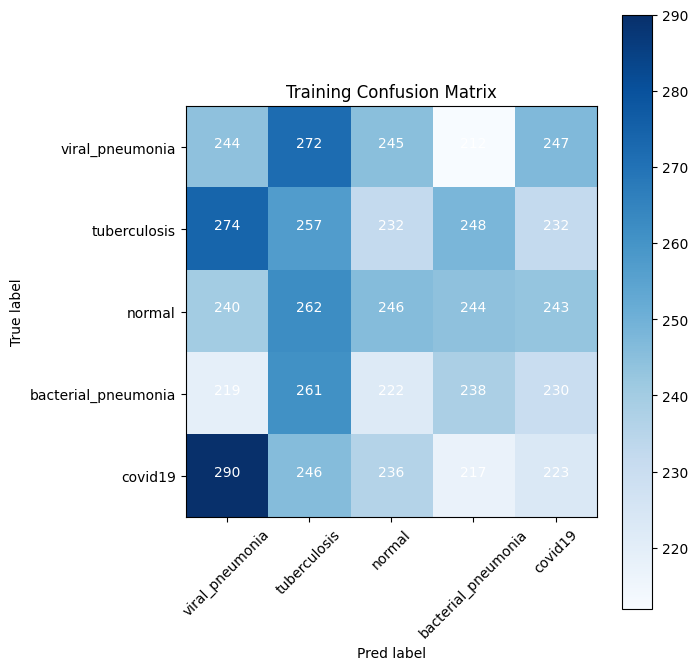

In [ ]:
inp = '/content/lung_disease'
classes = []
filename = inp
for sub_folder in os.listdir(os.path.join(filename, 'train_dir')):
    classes.append(sub_folder)
# print(classes)
classname_label = classes
train_conf_matrix = confusion_matrix(train_true_labels, train_predicted_labels)

# Plot
plt.figure(figsize=(7, 7))
plt.imshow(train_conf_matrix, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Training Confusion Matrix")
plt.colorbar()

tick_marks = np.arange(len(classname_label))
plt.xticks(tick_marks, classname_label, rotation=45)
plt.yticks(tick_marks, classname_label)

thresh = train_conf_matrix.max() / 2.0
for i, j in itertools.product(
    range(train_conf_matrix.shape[0]), range(train_conf_matrix.shape[1])
):
    plt.text(
        j,
        i,
        train_conf_matrix[i, j],
        horizontalalignment="center",
        color="white" if train_conf_matrix[i, j] > thresh else "black",
    )

plt.tight_layout()
plt.ylabel("True label")
plt.xlabel("Pred label")
plt.show()